# RK Model 
- The model is an attempt to understand the influence of physical processes in cold regions. A 2-D transect along the Yakou catchement (Tibetan Plateau, Heihe river basin) is the field site.   
- The notebook describes the model configurations, extracts the output and plots it. 

### Brief description:

- Goal – Simple scenario that sets the initial conditions to be very cold (-9°C) with the hydrostatic head at - 1 m (Level of permafrost table or active layer), The top boundary condition is the average mean temperature of -4.7°C at the Tibetan Plateau.
- T : 5 years (1825 days) - Daily time steps 
- Processes: Subsurface permafrost - flow, energy
- Mesh: Pseudo 1-D column with three layers - organic, mineral, and bedrock layer with increasing cell sizes.
- Initial conditions : -1.0 m – hydrostatic head (in m) to represent the permafrost table level or active layer, 264.15 K (-9°C).
- Boundary conditions :  Top - 268.45 K  (-4.7 °C)

- Parameters:
    - VGc - Peat: alpha – 0.0005, n – 1.39, S_res = 0.05
    - VGc - Mineral & Bedrock: alpha – 2e-05, n – 1.58, S_res = 0.2
    - Thermal conductivity: Peat – L_dry – 0.07 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Thermal conductivity: Mineral & Bedrock – L_dry – 0.29 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Porosity, Compressible porosity: Peat – 0.85, 1e-07 Pa^-1; Mineral – 0.5, 1e-08 Pa^-1;
    - Permeability: Peat – 5e-11 m^2, Mineral & Bedrock – 2e-13 m^2 
    - Density: Peat – 700 kg/m^3, Mineral & Bedrock – 2170 kg/m^3

- Observations:
    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.

- I/O files:
    - Xml file: Case1B_II.xml
    - Output folder (.demo file): Case1B_II.demo

- Expected results: Initially the water table level is set at 1 m below the surface and the initial temperature of all the cells is -9°C. With a top BC of -4.7°C a freezing front would be initiated at the top with water being attracted to the freezing front (Cryosuction). The freezing depth would depend on top BC, time period and subsurface parameters (close to the surface).  

### Detailed description:

#### 1. Physical processes - Cases: Case 1
The physical processes that are considered - Subsurface flow + Subsurface energy (with ice content). A custom strong coupler - 'subsurface permafrost' couples the 'permafrost flow' and 'three-phase energy' PKs. 

<img src='../figures/Case1_process.jpg' width='500' height='500' alt='Case1 physical process' align='center' />  




#### 2. Mesh - Stages: Stage B
Two types of meshes are considered here. The first mesh (Yakou_column.exo) resembles the properties of the hillslope transect that we would like to simulate. Once the meshing issues are resolved,we will be using this mesh. The second mesh is a test mesh that was generated by the ATS developers with similar properties. We will be using this mesh. 

1. Yakou_column.exo - Organic layer (0.25 m), Mineral layer (0.25 - 20 m), Bedrock (20 – 40 m) with increasing cell thickness. [Cell thickness: 0.05 m until 0.25 m (Organic layer); 0.05 m until 0.25 m and increasing cell size by 2 units until 2 m, 2 m - 20 m, we have 2 m cell sizes (Mineral layer); we again have 2 m cell sizes from 20 m - 40 m]

2. tes_org_spinup_column.exo - Organic layer (0.385 m), Mineral layer (2.24 m), Bedrock (42.48 m); Cell thickness starts with a magnitude of 0.01 m and increases in magnitude of 1.2, 1.4 & 1.5 as cell numbers increase from 20, 20 - 26, and >26. 

##### Mesh - Run it with yakou_column.xml once the meshing issues has been resolved.  

Images of 'tes_org_spinup_column.exo':

<img src='../figures/1D_test_org_spinup_column_1.PNG' width='70' height='90' alt='1D_test_org_column_1' align='left' />  

<img src='../figures/1D_test_org_spinup_column_2.PNG' width='120' height='200' alt='1D_test_org_column_2' align='right' />  





#### 3. Scenarios (IC, BC): Scenario I


| :------:               | IC   |  BC    |                 
| :----------------------------------------------------------------- | :------: | :------: |  
| Hydraulic                                                          | Hydrostatic head (-1 m) | - |
| Thermal                                                            | 264.15 K (-9°C)   |  BCTopconstT = 268.45 K  (-4.7 °C) |

##### Time period (T) of 5 years (daily time step)


#### 4. Parameters:


|Sl. No.|	Parameter type|	Parameter|	Unit|	Soil type/Water	|Current value|
| --- | --- | --- | --- | --- | --- |
1 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha |	Pa^{-1} |	Peat |	0.0005 |
2 |	Variably saturated properties - van Genuchten model |	van Genuchten n |	[-] | Peat |		1.39
3 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-] | Peat |		0.05
4 |	Variably saturated properties - van Genuchten model |	smoothing interval width 	| [saturation] | Peat |		0.05
5 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	Pa^{-1} | Mineral |	0.0005
6 |	Variably saturated properties - van Genuchten model |	van Genuchten n	| [-]	| Mineral |		1.39
7 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-]	| Mineral |		0.05
8 |	Variably saturated properties - van Genuchten model |	smoothing interval width  |	[saturation] | Mineral |			0.05
9 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	| Pa^{-1}	| Bedrock |	2.00E-05
10 | Variably saturated properties - van Genuchten model |		van Genuchten n	| [-] | Bedrock |	1.58
11 | Variably saturated properties - van Genuchten model |		residual saturation	| [-]	| Bedrock |	0.2
12 | Variably saturated properties - van Genuchten model |		smoothing interval width 	| [saturation] | Bedrock |		0.05
13 | 	Permafrost model parameters - fpd permafrost model [Cryosuction] |	minimum dsi_dpressure magnitude |	??	| For the entire model |	1.00E-12 |
14 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Peat |	0.67 |
15 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Peat |		0.07 |
16 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Peat |	1 |
17 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-]	|	Peat |	0.5 |
18 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Mineral |	1 |
19 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry | [W m^-1 K^-1] |	Mineral |		0.29 |
20 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen| [-] |	Mineral |		1 |
21 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen | [-] |	Mineral |		0.5 |
22 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) |	[W m^-1 K^-1] |	Bedrock |	1 |
23 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Bedrock |		0.29 |
24 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Bedrock |	1 |
25 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-] |	Bedrock |		0.5 |
39 |	Physical |	Base porosity |	[-] |	Peat |	0.85 |
40 |	Physical |	Base porosity |	[-]	 | Mineral |	0.5 |
41 |	Physical |	Base porosity | [-]	| bedrock	 | 0.5 |
42 |	Physical |	Pore compressibility	| [Pa^-1] |	Peat |	1.00E-07 |
43 |	Physical |	Pore compressibility	| [Pa^-1] |	Mineral |	1.00E-08 |
44 |	Physical |	Pore compressibility	| [Pa^-1] |	bedrock |	1.00E-08 |
45 |	Physical / Hydraulic |	Permeability	| m^2? |	Peat |	5.00E-11 |
46 |	Physical / Hydraulic |	Permeability	|m^2? |	Mineral |	2.00E-13 |
47 |	Physical / Hydraulic |	Permeability	| m^2? |	bedrock |	2.00E-13 |
48 |	Physical |	Density	| kg/m^3? |	Peat |	7.00E+02 |
49 | 	Physical |	Density	|kg/m^3? |	Mineral |	2.17E+03 |
50 |	Physical |	Density	|kg/m^3? |	bedrock |	2.17E+03 |

- The values of Bedrock are currently similar to that of Minerals. While conducting the parameter sensitivity analysis, the values will be changed.

#### 5. Visualization:

- The entire subsurface domain is visualized. 
- Cycles start period stop" - "{0,10,-1}". The unit is in days. Every 10 days, one observation instance of the entire column is dumped. T = 1825 days, therefore 184 instances are stored. (0, 10, 20 ... 1820, 1825 th day)  

#### 6. Observations:

- The variables under observation taken every day - {0.0,1.0,-1.0}: 

    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.


#### I/O files:

- Xml file: Case1B_II.xml
- Output folder (.demo file): Case1B_II.demo

## Workflow:
1. Importing all the modules
2. Plotting with the ats output code.
3. Plotting the visualization results.
4. Preparing the final results as initial conditions for another model (not required) 
4. Plotting the observation results.

### 1. Importing all the modules

In [1]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt

In [2]:
import h5py
import pandas as pd

In [3]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B


In [4]:
# Output directory name & input xml file name:
file_name = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_II.demo'
input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_II.xml'
### Reading the observation files:
file_observation = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_II.demo/observation.dat'
file_obs_name = 'Case1_B_II.dat'

### 2. Plotting with the ATS output code

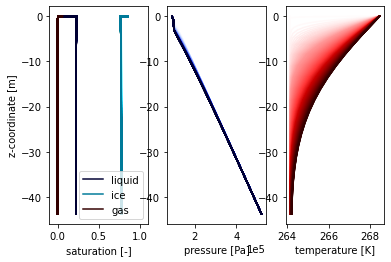

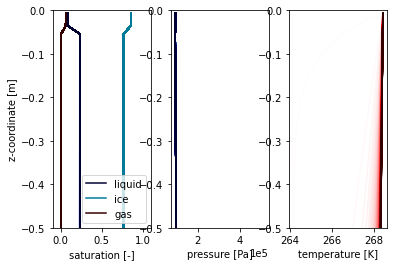

In [5]:
def plot(dirname, axs):
    """A generic plotting function that plots saturation as a function of depth."""

    plot_column_data.plot_subsurface(vis, ['pressure',], axs[0], cmap='jet')
    axs[0].set_xlabel('pressure [Pa]')
    ax.set_ylabel('z [m]')
    
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[1], None, cmap='jet')
    axs[0].set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

def plot(file_name, axs, style):
    # load the data
    vis = ats_xdmf.VisFile(file_name, time_unit='d')
    vis.loadMesh(columnar=True)
    dati = np.array([vis.getArray(v) for v in ["pressure", "pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"]])
    times = vis.times
    
    ice = colors.cm_mapper(-10, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = vis.centroids[:,2]
    for i,t in enumerate(times):
        label = False
        if i == len(times)-1:
            axs[0].plot(dati[2,i,:],z, style, color=water(t), label='liquid')
            axs[0].plot(dati[3,i,:],z, style, color=ice(t), label='ice')
            axs[0].plot(dati[4,i,:],z, style, color=gas(t), label='gas')
        else:
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
        axs[2].plot(dati[5,i,:],z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t))
        axs[0].plot(dati[3,i,:],z, style, color=ice(t))
        axs[0].plot(dati[4,i,:],z, style, color=gas(t))

def decorate(axs):
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[0].set_xlim([-.1,1.1])
    axs[0].legend()


# full column
fig, axs = plt.subplots(1,3)
plot(file_name, axs, '-')
decorate(axs)

# and a zoomed version
fig, axs = plt.subplots(1,3)
plot(file_name, axs, '-')
decorate(axs)
axs[0].set_ylim([-0.5,0])
axs[1].set_ylim([-0.5,0])
axs[2].set_ylim([-0.5,0])


plt.show()
            

In [6]:
# load the ATS solution
directory = f"{file_name}"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)

### 3. Plotting the visualization results

#### Extracting the names of the dataset:

In [7]:
### Extracting the subsurface data
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    porosity = hdf.get('base_porosity.cell.0')
    print(porosity)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'capillary_pressure_liq_ice.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'density_rock.cell.0', 'dwater_content|dtemperature.cell.0', 'energy.cell.0', 'enthalpy.cell.0', 'enthalpy_times_relative_permeability.cell.0', 'internal_energy_ice.cell.0', 'internal_energy_liquid.cell.0', 'internal_energy_rock.cell.0', 'mass_density_liquid.cell.0', 'molar_density_ice.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_ice.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'thermal_conductivity.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


<HDF5 group "/base_porosity.cell.0" (184 members)>


#### Determining the time instances at which the data is stored

In [8]:
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        print(time_period)
        print("Length of the time period - ",len(time_period))
        # Time series stored in an irregular format! - 
        # ['0' '100' '103' '104' '105' '106' '107' '108' '109' '110' '111']

[   0   10  100 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090  110
 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190  120 1200 1210 1220
 1230 1240 1250 1260 1270 1280 1290  130 1300 1310 1320 1330 1340 1350
 1360 1370 1380 1390  140 1400 1410 1420 1430 1440 1450 1460 1470 1480
 1490  150 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590  160 1600
 1610 1620 1630 1640 1650 1660 1670 1680 1690  170 1700 1710 1720 1730
 1740 1750 1760 1770 1780 1790  180 1800 1810 1820 1830  190   20  200
  210  220  230  240  250  260  270  280  290   30  300  310  320  330
  340  350  360  370  380  390   40  400  410  420  430  440  450  460
  470  480  490   50  500  510  520  530  540  550  560  570  580  590
   60  600  610  620  630  640  650  660  670  680  690   70  700  710
  720  730  740  750  760  770  780  790   80  800  810  820  830  840
  850  860  870  880  890   90  900  910  920  930  940  950  960  970
  980  990]
Length of the time period -  184


In [9]:
len(time_period)

184

#### Recreating the node information of the cells:
- The centroidal distance was calculated while generating the ats mesh - rk_model/Data/data_mesh/hillslope_example.ipynb
- And stored in the file : /home/rk/ats_rk/testing/ats-demos/rk_model/Data/data_mesh/test_org_column_centroidal_dist.csv

In [10]:
dz_hillslope = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/data_mesh/test_org_column_centroidal_dist.csv',header=None)
# Renaming the column:
dz_hillslope.columns = ['centroidal_distance']
dz_hillslope.head()

,centroidal_distance
0,0.006000
1,0.019200
2,0.035040
3,0.054048
4,0.076858


In [11]:
# Storing the negative of the centroidal distance as we are going downwards
z = -dz_hillslope['centroidal_distance']

In [12]:
print(z.head())

0   -0.006000
1   -0.019200
2   -0.035040
3   -0.054048
4   -0.076858
Name: centroidal_distance, dtype: float64


In [13]:
def inputfiles_pddataframes(file_name,t,z):
    """
    The function is defined to read the input files from the ats simulation. 
    For each time instance, a dataframe can store the data.
 
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    t : The time instance at which the data is required.
    Ex: cell_volume.cell.0/{t} - here 0/0 - signifies the first directory (with data at t=0), 
    similarly 0/1 - signifies the second directory (with data at t=1).
            
    Output parameters:
    
    data_results : pandas dataframe with all the key elements of the simulation.
    
    - idea - can't we write a smart function that directly accesses all the columns? - !
    
    """
    
    
    with h5py.File(file_name,'r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0/{t}'))
        cell_volume = cell_volume_all.flatten()
        
        
        # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
        # Can we simplify the code?
        
        data_results = pd.DataFrame(index=z,data=cell_volume,columns=['cell_volume'])

        mass_density_all = np.array(hdf.get(f'mass_density_liquid.cell.0/{t}'))
        mass_density = mass_density_all.flatten()
        data_results['mass_density [rho_l] [kg m^{-3}]'] = mass_density



        molar_density_all = np.array(hdf.get(f'molar_density_liquid.cell.0/{t}'))
        molar_density = molar_density_all.flatten()
        data_results['molar_density [n_l] [mol m^{-3}]'] = molar_density


        permeability_all = np.array(hdf.get(f'permeability.cell.0/{t}'))
        permeability = permeability_all.flatten()
        data_results['Absolute permeability [K] (m^{2})'] = permeability



        porosity_all = np.array(hdf.get(f'porosity.cell.0/{t}'))
        porosity = porosity_all.flatten()
        data_results['Porosity [phi] (-)'] = porosity

        pressure_all = np.array(hdf.get(f'pressure.cell.0/{t}'))
        pressure = pressure_all.flatten()
        data_results['Abs pressure [p_abs] [Pa]'] = pressure 
        # Water pressure or total pressure (Atm + water)? - Probably both

        relative_permeability_all = np.array(hdf.get(f'relative_permeability.cell.0/{t}'))
        relative_permeability = relative_permeability_all.flatten()
        data_results['Relative permeability [kr] [-]'] = relative_permeability


        saturation_gas_all = np.array(hdf.get(f'saturation_gas.cell.0/{t}'))
        saturation_gas = saturation_gas_all.flatten()
        data_results['Saturation of gas [s_g] [-]'] = saturation_gas


        saturation_liquid_all = np.array(hdf.get(f'saturation_liquid.cell.0/{t}'))
        saturation_liquid = saturation_liquid_all.flatten()
        data_results['Saturation of liquid [s_l] [-]'] = saturation_liquid


        
        saturation_ice_all = np.array(hdf.get(f'saturation_ice.cell.0/{t}'))
        saturation_ice = saturation_ice_all.flatten()
        data_results['Saturation of ice [s_i] [-]'] = saturation_ice
        
        temperature_all = np.array(hdf.get(f'temperature.cell.0/{t}'))
        temperature = temperature_all.flatten()
        data_results['Temperature [T] [K]'] = temperature


        viscosity_liquid_all = np.array(hdf.get(f'viscosity_liquid.cell.0/{t}'))
        viscosity_liquid = viscosity_liquid_all.flatten()
        data_results['viscosity_liquid [v] Pas]'] = viscosity_liquid


        water_content_all = np.array(hdf.get(f'water_content.cell.0/{t}'))
        water_content = water_content_all.flatten()
        data_results['water_content [theta] mols'] = water_content
        
        return data_results

##### Storing the data for all time instances

In [14]:
for i in time_period:
    # https://stackoverflow.com/questions/1060090/changing-variable-names-with-python-for-loops
    locals()["data_results_"+str(i)] = inputfiles_pddataframes(file_name=f'{file_name}/ats_vis_data.h5', t=i,z=z)

#### Defining a dataframe that extracts the data for a single variable for all time instances

In [15]:
def input_datavar(file_name, variable, z):
    """
    The function defined to extract a variable across all time instances.
    
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    variable: Name of the variable in the dataset that you are interested in.
    Ex: 'cell_volume'
    
    Output parameters:
    
    data_var : pandas dataframe with the time series data of the variable.
    
    """
    
    # To determine the time period and the list in which the dataframes 
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        ### Sorting the dataframes 
        time_period.sort()
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        var_all_0 = np.array(hdf.get(f'{variable}.cell.0/0'))
        var_0 = var_all_0.flatten()
        data_var = pd.DataFrame(index=z,data=var_0,columns=[f'0'])
        
        for i in time_period[1:]:
            var_all = np.array(hdf.get(f'{variable}.cell.0/{i}'))
            var = var_all.flatten()
            
            data_var[f'{i}'] = var
    
    return data_var

In [16]:
### Accessing the variable at all time instances

### Add or remove variable name if required
variables = ['saturation_liquid','saturation_ice','saturation_gas','pressure','relative_permeability','temperature']

for i in variables:
    locals()["df_"+str(i)] = input_datavar(file_name, i, z=z)
    len_rows = len(locals()["df_"+str(i)].columns)
    locals()["df_"+str(i)].columns = np.arange(0,len_rows,1)

In [17]:
df_pressure.head()

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
centroidal_distance,,,,,,,,,,,,,,,,,,,,,
-0.006000,91577.189900,92622.921932,92698.175702,92700.160416,92700.967005,92701.432566,92701.744580,92701.972310,92702.147737,92702.288192,...,92703.804871,92703.805847,92703.806812,92703.807767,92703.808712,92703.809647,92703.810572,92703.811491,92703.812391,92703.813293
-0.019200,91706.637680,92574.322401,92795.650774,92801.855802,92804.382396,92805.842254,92806.821389,92807.536499,92808.087704,92808.529278,...,92813.423821,92813.427660,92813.431467,92813.435242,92813.438984,92813.442695,92813.446375,92813.450023,92813.453646,92813.457232
-0.035040,91861.975016,92552.748810,92913.417572,92924.421729,92928.911934,92931.508855,92933.251667,92934.525060,92935.506907,92936.293675,...,92945.040505,92945.047458,92945.054352,92945.061189,92945.067968,92945.074692,92945.081360,92945.087975,92945.094533,92945.101040
-0.054048,92048.379819,91849.615245,91569.385937,91557.952987,91553.237088,91550.495577,91548.649517,91547.297235,91546.252338,91545.413479,...,91535.472627,91535.461441,91535.450319,91535.439259,91535.428260,91535.417322,91535.406443,91535.395621,91535.384858,91535.374154
-0.076858,92272.065583,92131.261206,91794.127395,91777.601394,91770.739975,91766.740430,91764.043452,91762.066403,91760.538240,91759.311353,...,91745.531005,91745.519865,91745.508818,91745.497862,91745.486995,91745.476217,91745.465525,91745.454917,91745.444396,91745.433957


In [18]:
pressure_head_data = df_pressure/(10000)

In [19]:
pressure_head_data.head()

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
centroidal_distance,,,,,,,,,,,,,,,,,,,,,
-0.006000,9.157719,9.262292,9.269818,9.270016,9.270097,9.270143,9.270174,9.270197,9.270215,9.270229,...,9.270380,9.270381,9.270381,9.270381,9.270381,9.270381,9.270381,9.270381,9.270381,9.270381
-0.019200,9.170664,9.257432,9.279565,9.280186,9.280438,9.280584,9.280682,9.280754,9.280809,9.280853,...,9.281342,9.281343,9.281343,9.281344,9.281344,9.281344,9.281345,9.281345,9.281345,9.281346
-0.035040,9.186198,9.255275,9.291342,9.292442,9.292891,9.293151,9.293325,9.293453,9.293551,9.293629,...,9.294504,9.294505,9.294505,9.294506,9.294507,9.294507,9.294508,9.294509,9.294509,9.294510
-0.054048,9.204838,9.184962,9.156939,9.155795,9.155324,9.155050,9.154865,9.154730,9.154625,9.154541,...,9.153547,9.153546,9.153545,9.153544,9.153543,9.153542,9.153541,9.153540,9.153538,9.153537
-0.076858,9.227207,9.213126,9.179413,9.177760,9.177074,9.176674,9.176404,9.176207,9.176054,9.175931,...,9.174553,9.174552,9.174551,9.174550,9.174549,9.174548,9.174547,9.174545,9.174544,9.174543


In [20]:
pressure_head_data.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            174, 175, 176, 177, 178, 179, 180, 181, 182, 183],
           dtype='int64', length=184)

In [21]:
### Time instances to plot
TimePeriod_plot = [0, 50, 100, 140, 160, 183]

Text(0.5, 0, 'Saturation (-)')

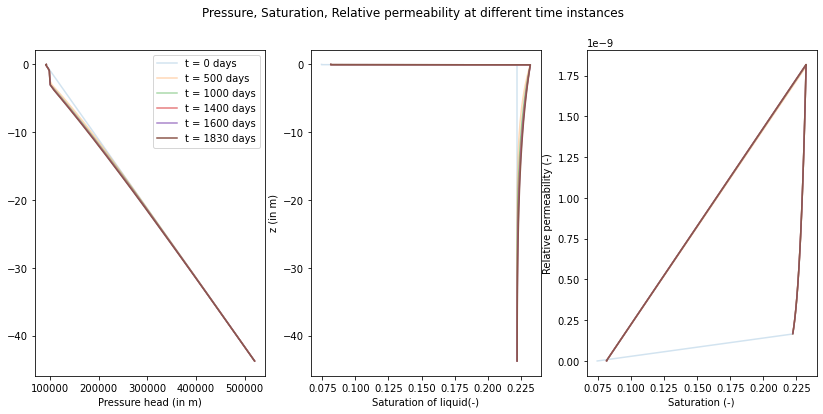

In [22]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Relative permeability at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[TimePeriod_plot[0]], z, alpha=0.2)
ax1.plot(df_saturation_liquid[TimePeriod_plot[1]], z, alpha=0.3)
ax1.plot(df_saturation_liquid[TimePeriod_plot[2]], z, alpha=0.5)
ax1.plot(df_saturation_liquid[TimePeriod_plot[3]], z, alpha=0.6)
ax1.plot(df_saturation_liquid[TimePeriod_plot[4]], z, alpha=0.8)
ax1.plot(df_saturation_liquid[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(df_pressure[TimePeriod_plot[0]], z, alpha=0.2, label =f't = {TimePeriod_plot[0]} days')
ax2.plot(df_pressure[TimePeriod_plot[1]], z, alpha=0.3, label =f't = {TimePeriod_plot[1]}0 days')
ax2.plot(df_pressure[TimePeriod_plot[2]], z, alpha=0.4, label =f't = {TimePeriod_plot[2]}0 days')
ax2.plot(df_pressure[TimePeriod_plot[3]], z, alpha=0.6, label =f't = {TimePeriod_plot[3]}0 days')
ax2.plot(df_pressure[TimePeriod_plot[4]], z, alpha=0.8, label =f't = {TimePeriod_plot[4]}0 days')
ax2.plot(df_pressure[TimePeriod_plot[5]], z, alpha=1, label =f't = {TimePeriod_plot[5]}0 days')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.legend()

ax3.plot(df_saturation_liquid[TimePeriod_plot[0]], df_relative_permeability[TimePeriod_plot[0]], alpha=0.2)
ax3.plot(df_saturation_liquid[TimePeriod_plot[1]], df_relative_permeability[TimePeriod_plot[1]], alpha=0.3)
ax3.plot(df_saturation_liquid[TimePeriod_plot[2]], df_relative_permeability[TimePeriod_plot[2]], alpha=0.4)
ax3.plot(df_saturation_liquid[TimePeriod_plot[3]], df_relative_permeability[TimePeriod_plot[3]], alpha=0.6)
ax3.plot(df_saturation_liquid[TimePeriod_plot[4]], df_relative_permeability[TimePeriod_plot[4]], alpha=0.8)
ax3.plot(df_saturation_liquid[TimePeriod_plot[5]], df_relative_permeability[TimePeriod_plot[5]], alpha=1)
#ax3.plot(df_saturation_liquid[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax3.set_ylabel('Relative permeability (-)')
ax3.set_xlabel('Saturation (-)')


Text(0.5, 0, 'Temperature (K)')

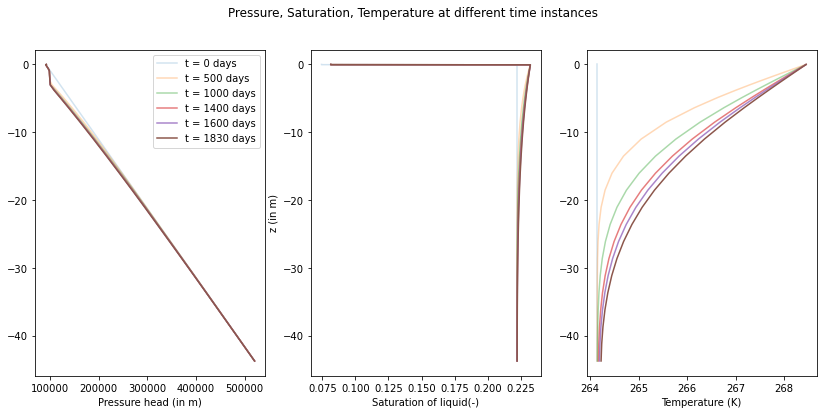

In [23]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Temperature at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[TimePeriod_plot[0]], z, alpha=0.2)
ax1.plot(df_saturation_liquid[TimePeriod_plot[1]], z, alpha=0.3)
ax1.plot(df_saturation_liquid[TimePeriod_plot[2]], z, alpha=0.5)
ax1.plot(df_saturation_liquid[TimePeriod_plot[3]], z, alpha=0.6)
ax1.plot(df_saturation_liquid[TimePeriod_plot[4]], z, alpha=0.8)
ax1.plot(df_saturation_liquid[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(df_pressure[TimePeriod_plot[0]], z, alpha=0.2, label =f't = {TimePeriod_plot[0]} days')
ax2.plot(df_pressure[TimePeriod_plot[1]], z, alpha=0.3, label =f't = {TimePeriod_plot[1]}0 days')
ax2.plot(df_pressure[TimePeriod_plot[2]], z, alpha=0.4, label =f't = {TimePeriod_plot[2]}0 days')
ax2.plot(df_pressure[TimePeriod_plot[3]], z, alpha=0.6, label =f't = {TimePeriod_plot[3]}0 days')
ax2.plot(df_pressure[TimePeriod_plot[4]], z, alpha=0.8, label =f't = {TimePeriod_plot[4]}0 days')
ax2.plot(df_pressure[TimePeriod_plot[5]], z, alpha=1, label =f't = {TimePeriod_plot[5]}0 days')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.legend()

ax3.plot(df_temperature[TimePeriod_plot[0]], z, alpha=0.2)
ax3.plot(df_temperature[TimePeriod_plot[1]], z, alpha=0.3)
ax3.plot(df_temperature[TimePeriod_plot[2]], z, alpha=0.4)
ax3.plot(df_temperature[TimePeriod_plot[3]], z, alpha=0.6)
ax3.plot(df_temperature[TimePeriod_plot[4]], z, alpha=0.8)
ax3.plot(df_temperature[TimePeriod_plot[5]], z, alpha=1)
#ax3.plot(df_temperature[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax3.set_xlabel('Temperature (K)')
#ax3.set_xlabel('Saturation (-)')

Text(0.5, 0, 'Temperature (K)')

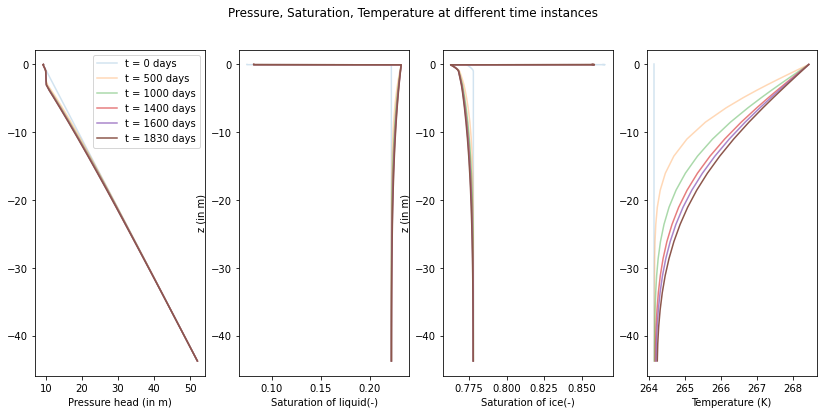

In [24]:
fig, (ax2, ax1, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Temperature at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[TimePeriod_plot[0]], z, alpha=0.2)
ax1.plot(df_saturation_liquid[TimePeriod_plot[1]], z, alpha=0.3)
ax1.plot(df_saturation_liquid[TimePeriod_plot[2]], z, alpha=0.5)
ax1.plot(df_saturation_liquid[TimePeriod_plot[3]], z, alpha=0.6)
ax1.plot(df_saturation_liquid[TimePeriod_plot[4]], z, alpha=0.8)
ax1.plot(df_saturation_liquid[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')


ax3.plot(df_saturation_ice[TimePeriod_plot[0]], z, alpha=0.2)
ax3.plot(df_saturation_ice[TimePeriod_plot[1]], z, alpha=0.3)
ax3.plot(df_saturation_ice[TimePeriod_plot[2]], z, alpha=0.5)
ax3.plot(df_saturation_ice[TimePeriod_plot[3]], z, alpha=0.6)
ax3.plot(df_saturation_ice[TimePeriod_plot[4]], z, alpha=0.8)
ax3.plot(df_saturation_ice[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_ice[200], z, alpha=1)
#ax1.legend()
ax3.set_ylabel('z (in m)')
ax3.set_xlabel('Saturation of ice(-)')

ax2.plot(pressure_head_data[TimePeriod_plot[0]], z, alpha=0.2, label =f't = {TimePeriod_plot[0]} days')
ax2.plot(pressure_head_data[TimePeriod_plot[1]], z, alpha=0.3, label =f't = {TimePeriod_plot[1]}0 days')
ax2.plot(pressure_head_data[TimePeriod_plot[2]], z, alpha=0.4, label =f't = {TimePeriod_plot[2]}0 days')
ax2.plot(pressure_head_data[TimePeriod_plot[3]], z, alpha=0.6, label =f't = {TimePeriod_plot[3]}0 days')
ax2.plot(pressure_head_data[TimePeriod_plot[4]], z, alpha=0.8, label =f't = {TimePeriod_plot[4]}0 days')
ax2.plot(pressure_head_data[TimePeriod_plot[5]], z, alpha=1, label =f't = {TimePeriod_plot[5]}0 days')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.legend()



ax4.plot(df_temperature[TimePeriod_plot[0]], z, alpha=0.2)
ax4.plot(df_temperature[TimePeriod_plot[1]], z, alpha=0.3)
ax4.plot(df_temperature[TimePeriod_plot[2]], z, alpha=0.4)
ax4.plot(df_temperature[TimePeriod_plot[3]], z, alpha=0.6)
ax4.plot(df_temperature[TimePeriod_plot[4]], z, alpha=0.8)
ax4.plot(df_temperature[TimePeriod_plot[5]], z, alpha=1)
#ax3.plot(df_temperature[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax4.set_xlabel('Temperature (K)')
#ax3.set_xlabel('Saturation (-)')

### Plotting the changes near the surface

(-0.3, 0.0)

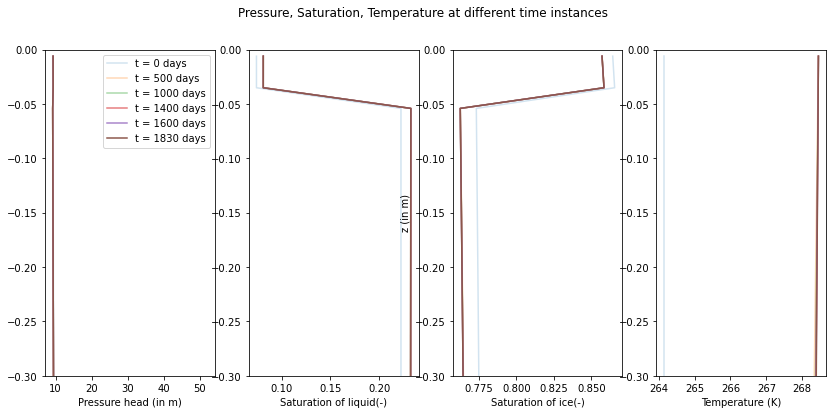

In [25]:
fig, (ax2, ax1, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Temperature at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[TimePeriod_plot[0]], z, alpha=0.2)
ax1.plot(df_saturation_liquid[TimePeriod_plot[1]], z, alpha=0.3)
ax1.plot(df_saturation_liquid[TimePeriod_plot[2]], z, alpha=0.5)
ax1.plot(df_saturation_liquid[TimePeriod_plot[3]], z, alpha=0.6)
ax1.plot(df_saturation_liquid[TimePeriod_plot[4]], z, alpha=0.8)
ax1.plot(df_saturation_liquid[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
#ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')
ax1.set_ylim(-0.3, 0.0)

ax3.plot(df_saturation_ice[TimePeriod_plot[0]], z, alpha=0.2)
ax3.plot(df_saturation_ice[TimePeriod_plot[1]], z, alpha=0.3)
ax3.plot(df_saturation_ice[TimePeriod_plot[2]], z, alpha=0.5)
ax3.plot(df_saturation_ice[TimePeriod_plot[3]], z, alpha=0.6)
ax3.plot(df_saturation_ice[TimePeriod_plot[4]], z, alpha=0.8)
ax3.plot(df_saturation_ice[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_ice[200], z, alpha=1)
#ax1.legend()
#ax3.set_ylabel('z (in m)')
ax3.set_xlabel('Saturation of ice(-)')
ax3.set_ylim(-0.3, 0.0)

ax2.plot(pressure_head_data[TimePeriod_plot[0]], z, alpha=0.2, label =f't = {TimePeriod_plot[0]} days')
ax2.plot(pressure_head_data[TimePeriod_plot[1]], z, alpha=0.3, label =f't = {TimePeriod_plot[1]}0 days')
ax2.plot(pressure_head_data[TimePeriod_plot[2]], z, alpha=0.4, label =f't = {TimePeriod_plot[2]}0 days')
ax2.plot(pressure_head_data[TimePeriod_plot[3]], z, alpha=0.6, label =f't = {TimePeriod_plot[3]}0 days')
ax2.plot(pressure_head_data[TimePeriod_plot[4]], z, alpha=0.8, label =f't = {TimePeriod_plot[4]}0 days')
ax2.plot(pressure_head_data[TimePeriod_plot[5]], z, alpha=1, label =f't = {TimePeriod_plot[5]}0 days')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax3.set_ylabel('z (in m)')
ax2.legend()
ax2.set_ylim(-0.3, 0.0)



ax4.plot(df_temperature[TimePeriod_plot[0]], z, alpha=0.2)
ax4.plot(df_temperature[TimePeriod_plot[1]], z, alpha=0.3)
ax4.plot(df_temperature[TimePeriod_plot[2]], z, alpha=0.4)
ax4.plot(df_temperature[TimePeriod_plot[3]], z, alpha=0.6)
ax4.plot(df_temperature[TimePeriod_plot[4]], z, alpha=0.8)
ax4.plot(df_temperature[TimePeriod_plot[5]], z, alpha=1)
#ax3.plot(df_temperature[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax4.set_xlabel('Temperature (K)')
ax4.set_ylim(-0.3, 0.0)
#ax3.set_xlabel('Saturation (-)')

### 4. Preparing the final results as initial conditions for another model 

##### Column data as an example (for comparison later) - Pressure, temperature and 'z' value is needed

In [26]:
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'column_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    pressure_column = np.array(hdf.get('pressure'))
    print(pressure_column)
    print(np.array(hdf.get('temperature')))
    print(np.array(hdf.get('z')))

List of datasets in this file: 
 
 ['pressure', 'temperature', 'z']


[-5715161.38222217   -38288.94464055  -137009.46125349  -303729.94754876
  -604598.55774324 -1359991.77832471 -2596737.52666966 -4390081.79553017
 -5899925.38370772 -2201592.7919399   -395567.94691654  -208693.39087789
  -106984.41961357   -37649.29204946    10003.73100321    42614.18374259
    65039.79466325    80682.27302661    92311.972959     227998.28604975
   368520.8505223    425196.35995214   448699.98231278   456942.84785056
   457954.83533019   456061.82400295   453760.93426082   452489.32873421
   453140.85676651   456234.79638825   462026.32667192   470512.04506409
   481399.31851633   494122.28984047   507898.01614843   521834.60226221
   535075.99445141   546946.19192434   557048.06020229   565285.52361617
   571808.38943001   576910.11783969   580922.4326558    584140.76186134
   586791.28979156   589030.36787342   590959.58325265   592643.21104279
   594122.35191633   595428.49402298   596724.59935131

##### Final results taken as initial conditions 

In [27]:
directory

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_II.demo'

In [28]:
time_period.max()

1830

In [29]:
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{directory}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    
    # 
    pressure_column = np.array(hdf.get(f'pressure.cell.0/{time_period.max()}'))
    temperature_column = np.array(hdf.get(f'temperature.cell.0/{time_period.max()}'))


In [30]:
hf_input = h5py.File('IC_column_data_final.h5','w')

In [31]:
hf_input.create_dataset('z',data=z)
hf_input.create_dataset('pressure',data=pressure_column)
hf_input.create_dataset('temperature',data=temperature_column)

<HDF5 dataset "temperature": shape (40, 1), type "<f8">

In [32]:
hf_input.close()

In [33]:
### Reading the file once more to check if the data are stored accurately
# Storing the input data as a dataframe
with h5py.File(f'IC_column_data_final.h5','r') as hdf:
    ls = list(hdf.keys())
    pressure_column_data = np.array(hdf.get(f'pressure'))
    temperature_column_data = np.array(hdf.get(f'temperature'))

    
    input_data_hillslope = pd.DataFrame(index=np.arange(1,41,1),data=z,columns=['centroidal_distance'])
    input_data_hillslope['pressure'] = pressure_column_data
    input_data_hillslope['temperature'] = temperature_column_data
    input_data_hillslope.rename(columns={'centroidal_distance':'z'}, inplace=True)



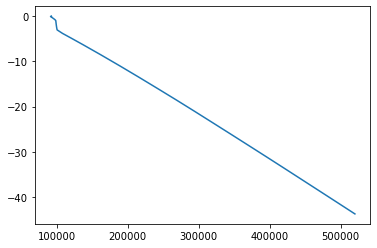

In [34]:
plt.plot(input_data_hillslope['pressure'], input_data_hillslope['z'])

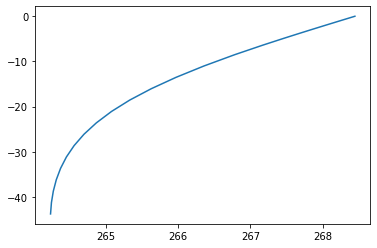

In [35]:
plt.plot(input_data_hillslope['temperature'], input_data_hillslope['z'])

#### 5. Plotting the observation results.

In [36]:
file_observation

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_II.demo/observation.dat'

In [37]:
file_obs_name

'Case1_B_II.dat'

In [38]:
# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat
with open(f'{file_observation}') as oldfile, open(f'{file_obs_name}', 'w') as newfile:
    for line in oldfile:
        if not any(remove_hash in line for remove_hash in remove_hashs):
            newfile.write(line)

In [39]:
# Reading the csv file 
df_observation = pd.read_csv(f'{file_obs_name}',sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,1.174495e+06,264.150000,264.150000,264.150000,264.150000,264.150000,264.150000,264.150000,264.150000,...,0.865505,0.773710,0.774521,0.775770,0.777361,0.777791,0.777791,0.777791,0.777791,0.0
1.0,86400.0,1.174495e+06,268.391325,268.108652,267.423383,266.393223,265.211961,264.399873,264.200136,264.154747,...,0.859266,0.766691,0.770298,0.774011,0.776978,0.777719,0.777784,0.777791,0.777791,1.0
2.0,172800.0,1.174495e+06,268.409940,268.216530,267.738323,266.960856,265.877917,264.801503,264.361237,264.188220,...,0.858998,0.765669,0.768850,0.772702,0.776325,0.777484,0.777736,0.777791,0.777791,2.0
3.0,259200.0,1.174495e+06,268.418324,268.265284,267.884496,267.248172,266.288876,265.153662,264.556215,264.247301,...,0.858875,0.765161,0.768033,0.771793,0.775708,0.777182,0.777651,0.777791,0.777791,3.0
4.0,345600.0,1.174495e+06,268.423143,268.293347,267.969491,267.421489,266.562432,265.442150,264.754292,264.326075,...,0.858802,0.764855,0.767508,0.771137,0.775170,0.776856,0.777536,0.777791,0.777791,4.0


#### Plotting the values 
##### 1. Subsurface temperature

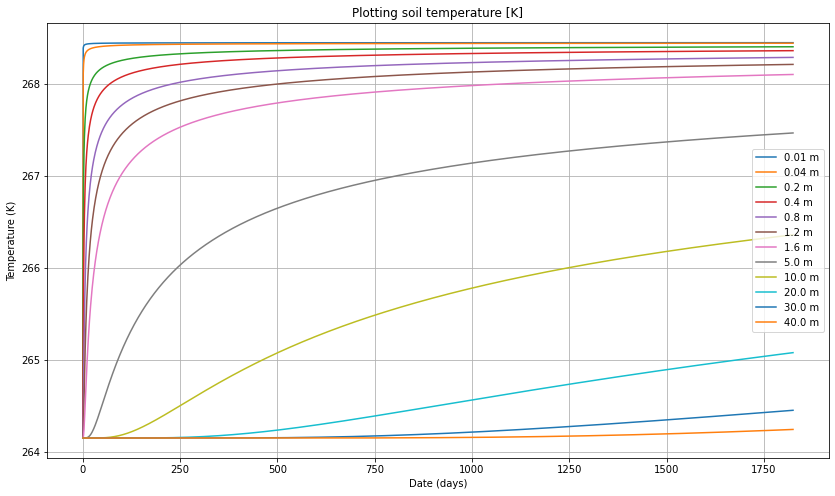

In [40]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil temperature [K]')
plt.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
plt.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
plt.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
plt.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
plt.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
plt.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
plt.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
plt.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
plt.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
plt.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
plt.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
plt.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

##### 2. Saturation of liquid

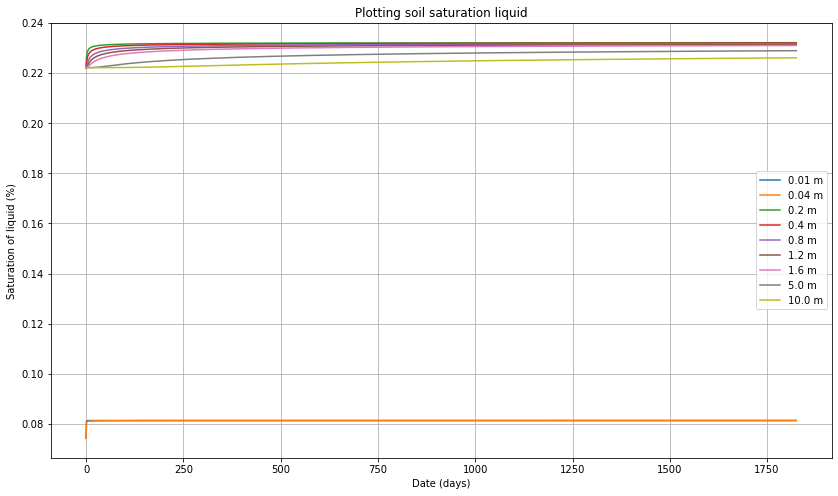

In [41]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil saturation liquid')
plt.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
plt.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
plt.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

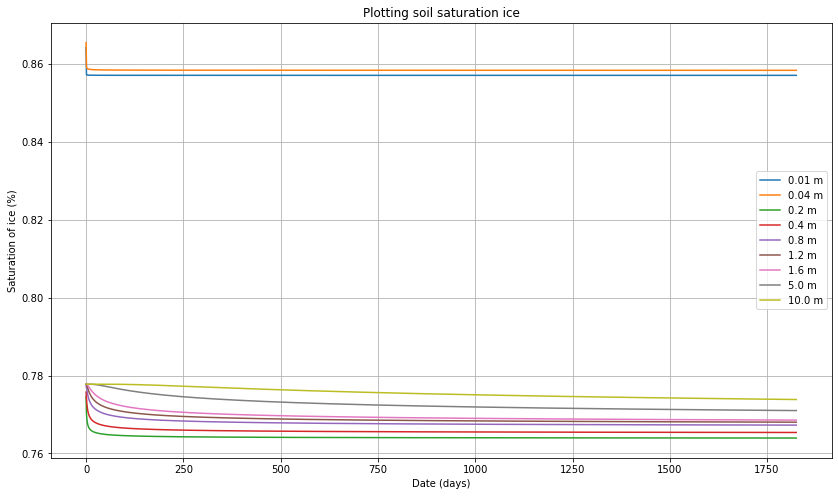

In [42]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil saturation ice')
plt.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
plt.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
plt.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

plt.ylabel('Saturation of ice (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

### Plotting temperature, saturation of liquid, and saturation of ice

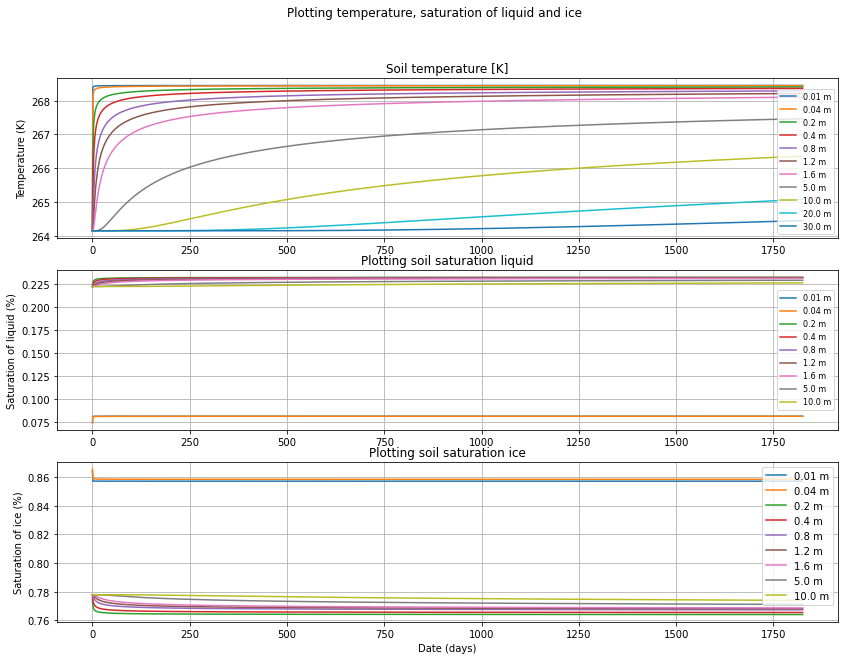

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

### Comments:
- The initial temperature of 264.15 K initiated freezing within the 1-D soil column. The saturation of ice in organic layer > saturation of ice in mineral layer. Similarly s_lo < s_im. Organic layer is highly porous and therefore easily drains water, hence s_lo is lower. 
- The temperature increases within the column from top to bottom with time. Due to the increase in temperature, the saturation of liquid increases within both materials and saturation of ice decreases and then the values remain constant.
- The contrast in the behaviour of organic and mineral layer (in terms of hydraulic influence) is seen above. 